In [1]:
%matplotlib
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math

Using matplotlib backend: MacOSX


In [9]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

## Load in datasets

In [6]:
sales = pd.read_csv('kc_house_data.csv')
sales = sales.sort(['sqft_living','price'])

/Users/Christy/miniconda3/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [21]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 1)

In [23]:
poly1_data = sm.add_constant(poly1_data)
poly1_model = sm.OLS(sales['price'],poly1_data)
poly1_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               0.00
Time:                        12:38:08   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -4.358e+04   4402.690     -9.899      0.000     -5.22e+04  -3.5e+04
power_1      280.6236      1.936    144.920      0.000       276.828   284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot model 1 results

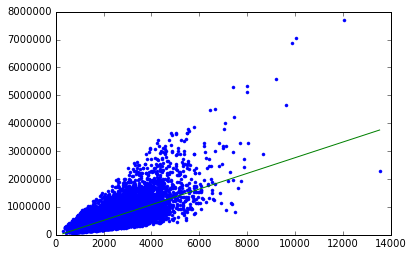

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(poly1_data['power_1'],sales['price'],'.',
poly1_data['power_1'], poly1_model.fit().predict(poly1_data),'-')

## repeat for 2nd, 3rd and 15th degrees

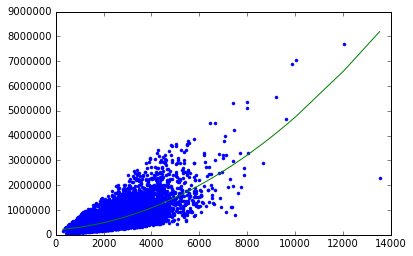

In [99]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
poly2_data = sm.add_constant(poly2_data)
poly2_model = sm.OLS(sales['price'],poly2_data)
plt.plot(poly2_data['power_1'],sales['price'],'.',
poly2_data['power_1'], poly2_model.fit().predict(poly2_data),'-')

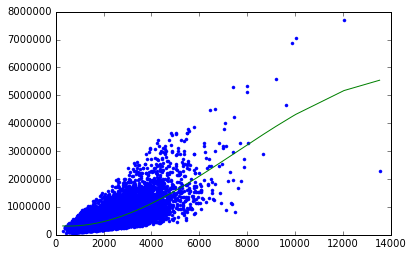

In [30]:
poly3_data = polynomial_dataframe(sales['sqft_living'], 3)
poly3_data = sm.add_constant(poly3_data)
poly3_model = sm.OLS(sales['price'],poly3_data)
plt.plot(poly3_data['power_1'],sales['price'],'.',
poly3_data['power_1'], poly3_model.fit().predict(poly3_data),'-')

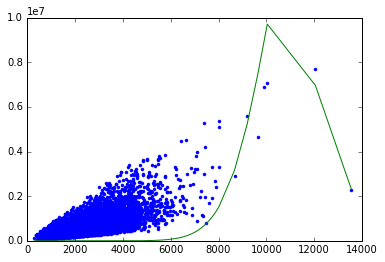

In [33]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
poly15_data = sm.add_constant(poly15_data)
poly15_model = sm.OLS(sales['price'],poly15_data.astype(float))
plt.plot(poly15_data['power_1'],sales['price'],'.',
poly15_data['power_1'], poly15_model.fit().predict(poly15_data),'-')

## Train on 4 datasets

In [35]:
dataset1 = pd.read_csv('wk3_kc_house_set_1_data.csv')
dataset2 = pd.read_csv('wk3_kc_house_set_2_data.csv')
dataset3 = pd.read_csv('wk3_kc_house_set_3_data.csv')
dataset4 = pd.read_csv('wk3_kc_house_set_4_data.csv')

In [37]:
poly15_data1 = polynomial_dataframe(dataset1['sqft_living'], 15)
poly15_data1 = sm.add_constant(poly15_data1)
poly15_model1 = sm.OLS(dataset1['price'],poly15_data1.astype(float))
poly15_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -1.734
Model:                            OLS   Adj. R-squared:                 -1.735
Method:                 Least Squares   F-statistic:                    -1713.
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               1.00
Time:                        13:05:51   Log-Likelihood:                -79975.
No. Observations:                5404   AIC:                         1.600e+05
Df Residuals:                    5401   BIC:                         1.600e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        6.998e-94   4.33e-95     16.163      0.000     6.15e-94  7.85e-94 
power_1     -1.159e-48   7.17e-50    -16.163      0.000     -1.3e-48 -1.02e-48 
power_2      4.486e-55   2.78e-56     16.163      0.000     3.94e-55  5.03e-55 
power_3      4.959e-60   3.07e-61     16.163      0.000     4.36e-60  5.56e-60 
power_4    -3.275e-101  5.93e-102     -5.527      0.000   -4.44e-101 -2.11e-101
power_5      6.108e-86   5.22e-87     11.691      0.000     5.08e-86  7.13e-86 
power_6      1.367e-70   8.45e-72     16.163      0.000      1.2e-70  1.53e-70 
power_7      1.036e-66   6.41e-68     16.163      0.000      9.1e-67  1.16e-66 
power_8      7.699e-63   4.76e-64     16.163      0.000     6.77e-63  8.63e-63 
power_9      5.544e-59   3.43e-60     16.163      0.000     4.87e-59  6.22e-59 
power_10     3.787e-55   2.34e-56     16.163      0.000     3.33e-55  4.25e-55 
power_11     2.365e-51   1.46e-52     16.163      0.000     2.08e-51  2.65e-51 
power_12      1.25e-47   7.73e-49     16.163      0.000      1.1e-47   1.4e-47 
power_13     4.466e-44   2.76e-45     16.163      0.000     3.92e-44  5.01e-44 
power_14    -6.957e-48   4.34e-49    -16.044      0.000    -7.81e-48 -6.11e-48 
power_15     2.702e-52    1.7e-53     15.939      0.000     2.37e-52  3.03e-52 
==============================================================================
Omnibus:                     3030.487   Durbin-Watson:                   0.206
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77036.642
Skew:                           2.179   Prob(JB):                         0.00
Kurtosis:                      20.976   Cond. No.                     5.41e+62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+62. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
poly15_data2 = polynomial_dataframe(dataset2['sqft_living'], 15)
poly15_data2 = sm.add_constant(poly15_data2)
poly15_model2 = sm.OLS(dataset2['price'],poly15_data2.astype(float))
poly15_model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -2.111
Model:                            OLS   Adj. R-squared:                 -2.112
Method:                 Least Squares   F-statistic:                    -1830.
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               1.00
Time:                        13:06:21   Log-Likelihood:                -79569.
No. Observations:                5398   AIC:                         1.591e+05
Df Residuals:                    5395   BIC:                         1.592e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.518e-90   1.88e-91     18.760      0.000      3.15e-90  3.89e-90
power_1    -3.094e-48   1.65e-49    -18.760      0.000     -3.42e-48 -2.77e-48
power_2    -9.089e-54   4.84e-55    -18.760      0.000        -1e-53 -8.14e-54
power_3     1.062e-57   5.66e-59     18.760      0.000      9.51e-58  1.17e-57
power_4     1.799e-97   1.82e-98      9.883      0.000      1.44e-97  2.16e-97
power_5     1.604e-71   8.55e-73     18.760      0.000      1.44e-71  1.77e-71
power_6     8.767e-68   4.67e-69     18.760      0.000      7.85e-68  9.68e-68
power_7     4.711e-64   2.51e-65     18.760      0.000      4.22e-64   5.2e-64
power_8     2.476e-60   1.32e-61     18.760      0.000      2.22e-60  2.73e-60
power_9     1.256e-56    6.7e-58     18.760      0.000      1.12e-56  1.39e-56
power_10    6.021e-53   3.21e-54     18.760      0.000      5.39e-53  6.65e-53
power_11    2.628e-49    1.4e-50     18.760      0.000      2.35e-49   2.9e-49
power_12     9.66e-46   5.15e-47     18.760      0.000      8.65e-46  1.07e-45
power_13    2.391e-42   1.27e-43     18.760      0.000      2.14e-42  2.64e-42
power_14   -5.717e-46   3.09e-47    -18.482      0.000     -6.32e-46 -5.11e-46
power_15    3.391e-50   1.86e-51     18.256      0.000      3.03e-50  3.76e-50
==============================================================================
Omnibus:                     2179.093   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39118.025
Skew:                           1.465   Prob(JB):                         0.00
Kurtosis:                      15.858   Cond. No.                     1.95e+62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+62. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
poly15_data3 = polynomial_dataframe(dataset3['sqft_living'], 15)
poly15_data3 = sm.add_constant(poly15_data3)
poly15_model3 = sm.OLS(dataset3['price'],poly15_data3.astype(float))
poly15_model3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -1.688
Model:                            OLS   Adj. R-squared:                 -1.689
Method:                 Least Squares   F-statistic:                    -1697.
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               1.00
Time:                        13:06:53   Log-Likelihood:                -79894.
No. Observations:                5409   AIC:                         1.598e+05
Df Residuals:                    5406   BIC:                         1.598e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       9.178e-92   5.36e-93     17.107      0.000      8.13e-92  1.02e-91
power_1    -9.673e-49   5.65e-50    -17.107      0.000     -1.08e-48 -8.56e-49
power_2     3.104e-54   1.81e-55     17.107      0.000      2.75e-54  3.46e-54
power_3             0          0        nan        nan             0         0
power_4     9.775e-98   5.62e-99     17.398      0.000      8.67e-98  1.09e-97
power_5     8.748e-73   5.11e-74     17.107      0.000      7.75e-73  9.75e-73
power_6     5.735e-69   3.35e-70     17.107      0.000      5.08e-69  6.39e-69
power_7      3.58e-65   2.09e-66     17.107      0.000      3.17e-65  3.99e-65
power_8     2.185e-61   1.28e-62     17.107      0.000      1.93e-61  2.44e-61
power_9     1.287e-57   7.52e-59     17.107      0.000      1.14e-57  1.43e-57
power_10     7.16e-54   4.19e-55     17.107      0.000      6.34e-54  7.98e-54
power_11    3.625e-50   2.12e-51     17.107      0.000      3.21e-50  4.04e-50
power_12    1.546e-46   9.03e-48     17.107      0.000      1.37e-46  1.72e-46
power_13    4.436e-43   2.59e-44     17.107      0.000      3.93e-43  4.94e-43
power_14   -8.991e-47   5.35e-48    -16.792      0.000        -1e-46 -7.94e-47
power_15    4.562e-51   2.77e-52     16.476      0.000      4.02e-51   5.1e-51
==============================================================================
Omnibus:                     3045.479   Durbin-Watson:                   0.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56425.268
Skew:                           2.300   Prob(JB):                         0.00
Kurtosis:                      18.139   Cond. No.                     1.41e+62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+62. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
poly15_data4 = polynomial_dataframe(dataset4['sqft_living'], 15)
poly15_data4 = sm.add_constant(poly15_data4)
poly15_model4 = sm.OLS(dataset4['price'],poly15_data4.astype(float))
poly15_model4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                      -1.669
Model:                            OLS   Adj. R-squared:                 -1.670
Method:                 Least Squares   F-statistic:                    -1688.
Date:                Thu, 28 Jul 2016   Prob (F-statistic):               1.00
Time:                        13:07:14   Log-Likelihood:                -79198.
No. Observations:                5402   AIC:                         1.584e+05
Df Residuals:                    5399   BIC:                         1.584e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1.071e-79   3.64e-81     29.443      0.000         1e-79  1.14e-79
power_1    -5.975e-39   2.03e-40    -29.443      0.000     -6.37e-39 -5.58e-39
power_2    -2.003e-44    6.8e-46    -29.443      0.000     -2.14e-44 -1.87e-44
power_3     4.072e-49   1.38e-50     29.443      0.000       3.8e-49  4.34e-49
power_4     4.094e-53   1.39e-54     29.443      0.000      3.82e-53  4.37e-53
power_5     5.363e-71   2.96e-72     18.112      0.000      4.78e-71  5.94e-71
power_6     5.368e-58   1.82e-59     29.443      0.000      5.01e-58  5.73e-58
power_7     2.139e-54   7.26e-56     29.443      0.000         2e-54  2.28e-54
power_8     8.136e-51   2.76e-52     29.443      0.000      7.59e-51  8.68e-51
power_9     2.875e-47   9.77e-49     29.443      0.000      2.68e-47  3.07e-47
power_10     9.02e-44   3.06e-45     29.443      0.000      8.42e-44  9.62e-44
power_11    2.293e-40   7.79e-42     29.443      0.000      2.14e-40  2.45e-40
power_12    3.687e-37   1.25e-38     29.443      0.000      3.44e-37  3.93e-37
power_13   -1.549e-40   5.43e-42    -28.530      0.000     -1.66e-40 -1.44e-40
power_14    2.163e-44    7.8e-46     27.734      0.000      2.01e-44  2.32e-44
power_15   -1.002e-48   3.71e-50    -27.036      0.000     -1.07e-48  -9.3e-49
==============================================================================
Omnibus:                     1499.456   Durbin-Watson:                   0.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102981.375
Skew:                          -0.401   Prob(JB):                         0.00
Kurtosis:                      24.375   Cond. No.                     2.42e+61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+61. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Find best model

In [80]:
training_dataset = pd.read_csv('wk3_kc_house_train_data.csv')
validation_dataset = pd.read_csv('wk3_kc_house_valid_data.csv')
test_dataset = pd.read_csv('wk3_kc_house_test_data.csv')

In [104]:
# loop through power 1 to 15 and report rss on validation set
def model_power_N(n):
    for power in range(1, n+1):
        training = polynomial_dataframe(training_dataset['sqft_living'], power)
        training = sm.add_constant(training)
        validation = sm.add_constant(polynomial_dataframe(validation_dataset['sqft_living'], power))
        model = sm.OLS(training_dataset['price'],training.astype(float))
        validation_prediction = model.fit().predict(validation)
        print ((validation_dataset['price'] - validation_prediction)**2).sum()

In [105]:
model_power_N(15)

6.290978863e+14
6.23955062706e+14
6.25820277867e+14
6.07701763581e+14
6.35093852158e+14
1.7776936805e+15
1.00744094225e+16
4.8506719556e+16
2.1833766138e+17
9.45596860232e+17
2.10642914695e+17
5.24189112221e+17
1.42031560019e+18
4.02649551232e+18
1.16529985811e+19


In [65]:
training4 = polynomial_dataframe(training_dataset['sqft_living'], 2)
training4 = sm.add_constant(training4)
test4 = sm.add_constant(polynomial_dataframe(test_dataset['sqft_living'], 2))
model4 = sm.OLS(training_dataset['price'],training4.astype(float))
test_prediction = model4.fit().predict(test4)
((test_dataset['price'] - test_prediction)**2).sum()

135542039274080.55

In [55]:
for n in range(1,3):
    print n

1
2


In [96]:
import graphlab as gl
training4 = polynomial_dataframe(training_dataset['sqft_living'], 5)
training4['price'] = training_dataset['price']
test = polynomial_dataframe(test_dataset['sqft_living'], 5)
test['price'] = test_dataset['price']
model=graphlab.linear_regression.create(gl.SFrame(training4), target = 'price', features = ['power_1','power_2','power_3','power_4','power_5'], validation_set = gl.SFrame(test))
test_prediction = model.predict(gl.SFrame(test)['power_1','power_2','power_3','power_4','power_5'])
print ((test_dataset['price'] - test_prediction)**2).sum()

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 5

Number of unpacked features : 5

Number of coefficients    : 6

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.037774     | 2180170.320002     | 2013745.457559       | 251539.601836 | 247270.933743   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

1.35553841832e+14


In [97]:
import graphlab as gl
training4 = polynomial_dataframe(training_dataset['sqft_living'], 6)
training4['price'] = training_dataset['price']
test = polynomial_dataframe(test_dataset['sqft_living'], 6)
test['price'] = test_dataset['price']
model=graphlab.linear_regression.create(gl.SFrame(training4), target = 'price', features = ['power_1','power_2','power_3','power_4','power_5','power_6'], validation_set = gl.SFrame(test))
test_prediction = model.predict(gl.SFrame(test)['power_1','power_2','power_3','power_4','power_5','power_6'])
print ((test_dataset['price'] - test_prediction)**2).sum()

Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 7

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.054979     | 2167607.098290     | 1950611.103763       | 251031.834802 | 246448.026477   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

1.34653108165e+14
